In [15]:
preprocessing <- function(ts_csv, total_csv){
    ts = read.csv(ts_csv)
    total <- read.csv(total_csv)
    df = data.frame(ts)
    df_total = data.frame(total)
    
    missing = df_total[,'total']<5000
    df_total[missing, 'total'] <- NA
    df[missing,] <-NA
    ts_total = ts(na.locf(df_total[,'total']))
    ts = ts(na.locf(df[, ]))
    return(list(ts, ts_total))
}

In [16]:
results = preprocessing('E:/summary/sept_casual.csv', 'E:/summary/sept_total.csv')

In [21]:
results

Unnamed..0,Unnamed..1,casual
1,0,456
1,1,258
1,2,140
1,3,98
1,4,91
1,5,101
1,6,178
1,7,240
1,8,316
1,9,333


In [8]:
cas_file <- 'E:/summary/sept_casual.csv'
cas <- read.csv(cas_file)
total_file <- 'E:/summary/sept_total.csv'
total <- read.csv(total_file)
df_total =data.frame(total)
df_cas = data.frame(cas)


In [9]:
total_file <- 'E:/summary/sept_total.csv'
total <- read.csv(total_file)

In [10]:
df_total =data.frame(total)
df_cas = data.frame(cas)

In [11]:
missing = df_total[,'total']<5000
df_total[missing, 'total'] <- NA
df_cas[missing, 'casual'] <-NA

In [12]:
df_total[missing, 'total'] <- NA
df_cas[missing, 'casual'] <-NA

In [6]:
library(zoo)


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [14]:
ts_total = ts(na.locf(df_total[1:711,'total']))
ts_cas = ts(na.locf(df_cas[1:711, 'casual']))

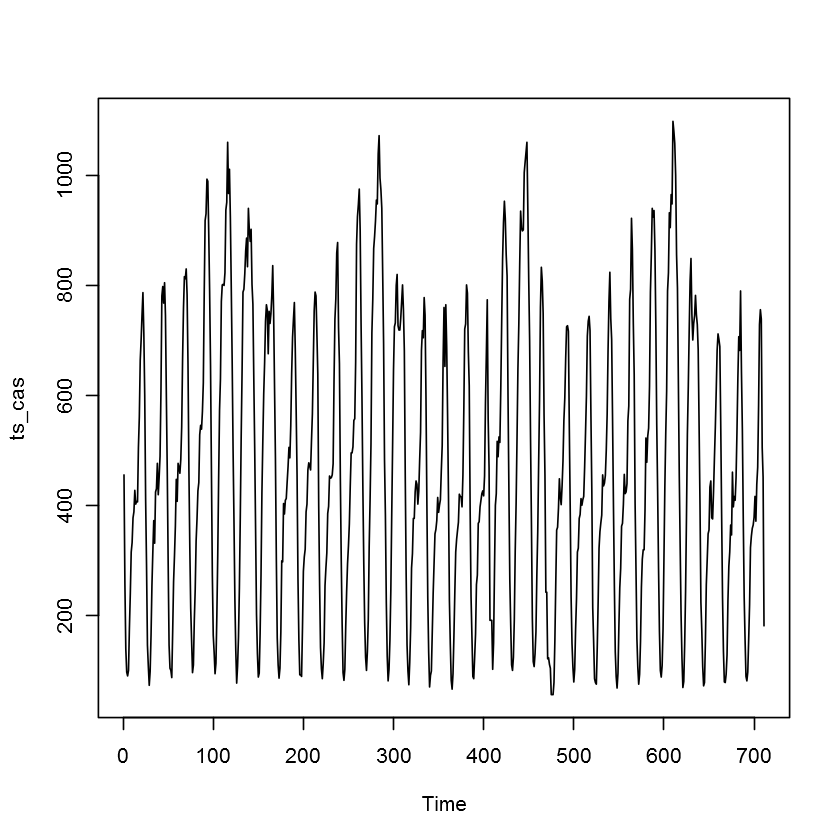

In [15]:
plot(ts_cas)

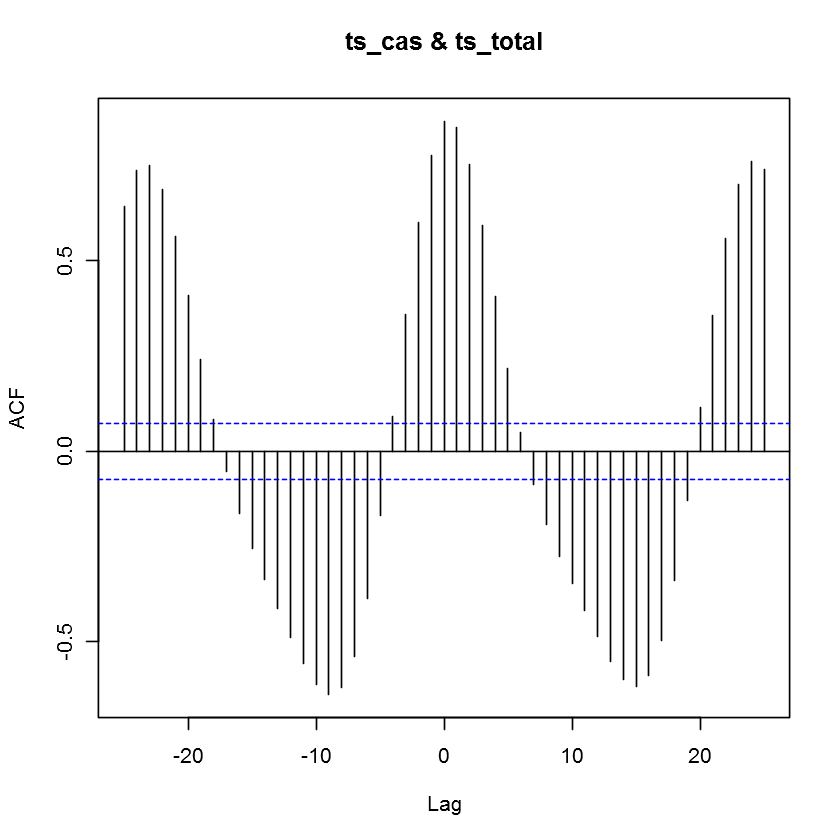

In [16]:
ccf(ts_cas, ts_total)

In [17]:
fit = lm(ts_cas~ts_total)

In [18]:
summary(fit)


Call:
lm(formula = ts_cas ~ ts_total)

Residuals:
    Min      1Q  Median      3Q     Max 
-235.96  -91.06   -4.28   46.24  446.91 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -21.410247  11.771520  -1.819   0.0694 .  
ts_total      0.008924   0.000194  46.010   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 132.1 on 709 degrees of freedom
Multiple R-squared:  0.7491,	Adjusted R-squared:  0.7488 
F-statistic:  2117 on 1 and 709 DF,  p-value: < 2.2e-16


In [53]:
res = ts(fit$residuals, frequency=24)

ERROR: Error in ts(fit$residuals, frequency = 24): 'ts' object must have one or more observations


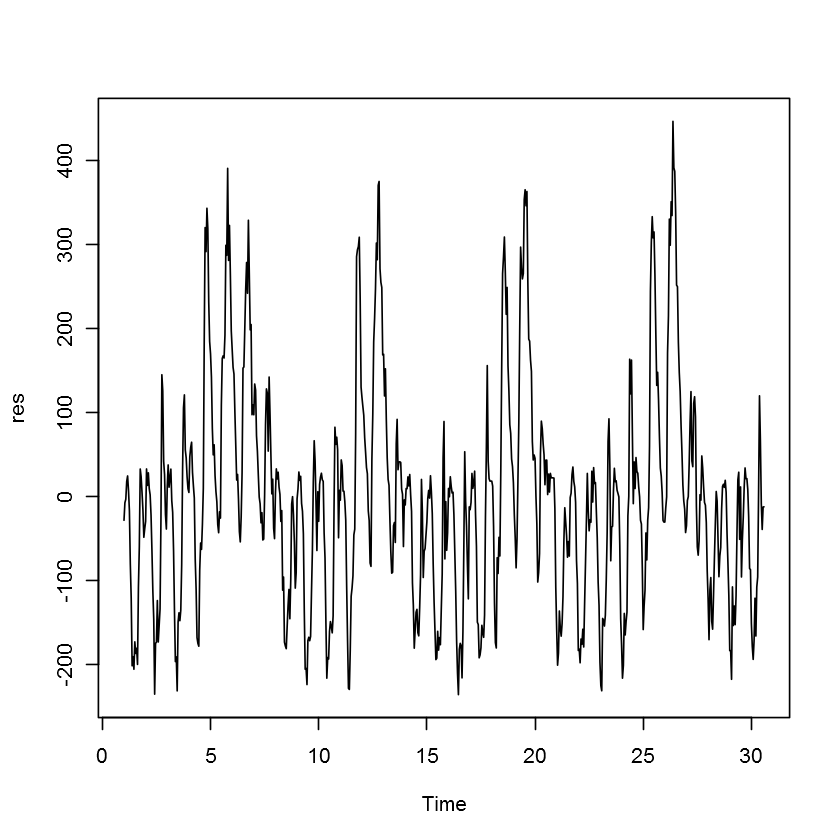

In [55]:
plot(res, type='l')

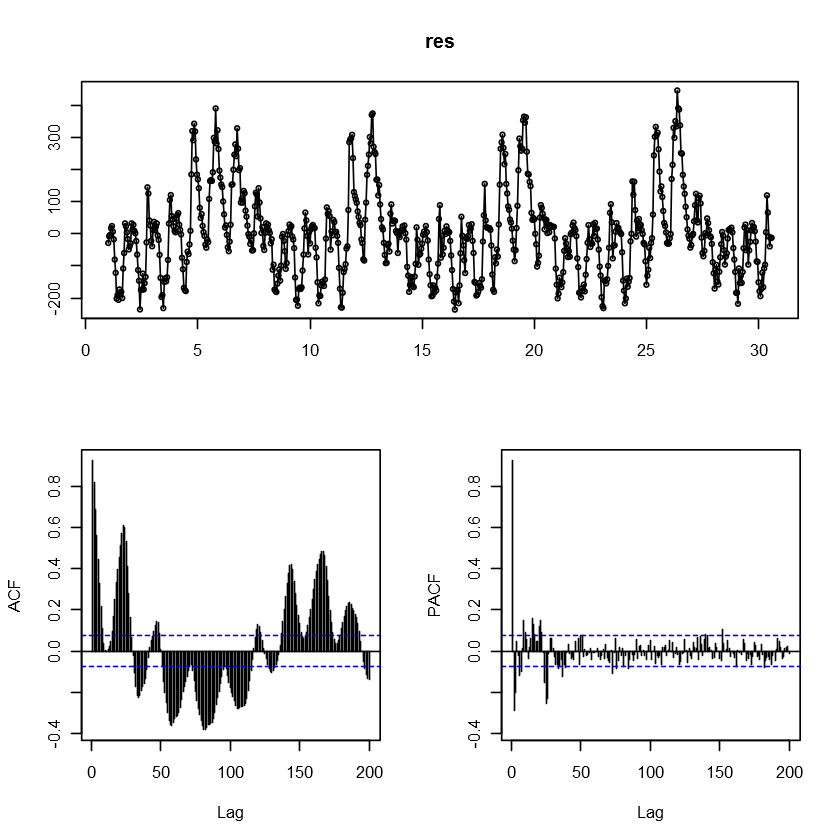

In [57]:
tsdisplay(res, lag.max=200)

In [23]:
library(forecast)

Loading required package: timeDate
This is forecast 7.1 



In [56]:
fit = stl(res, s.window='periodic')

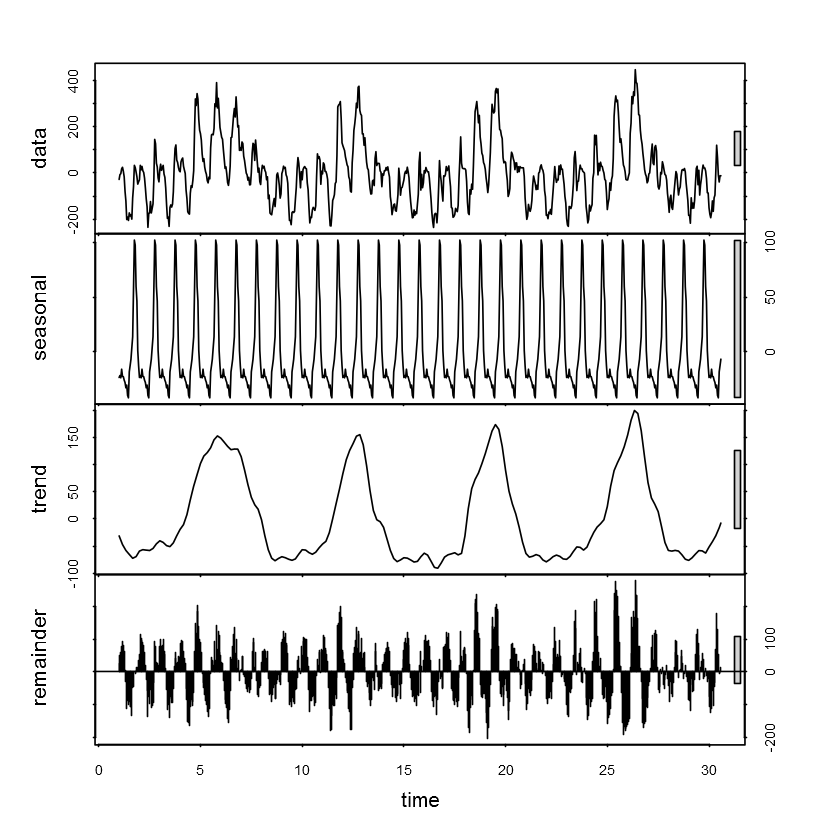

In [58]:
plot(fit)

In [59]:
remainder = fit$time.series[,'remainder']

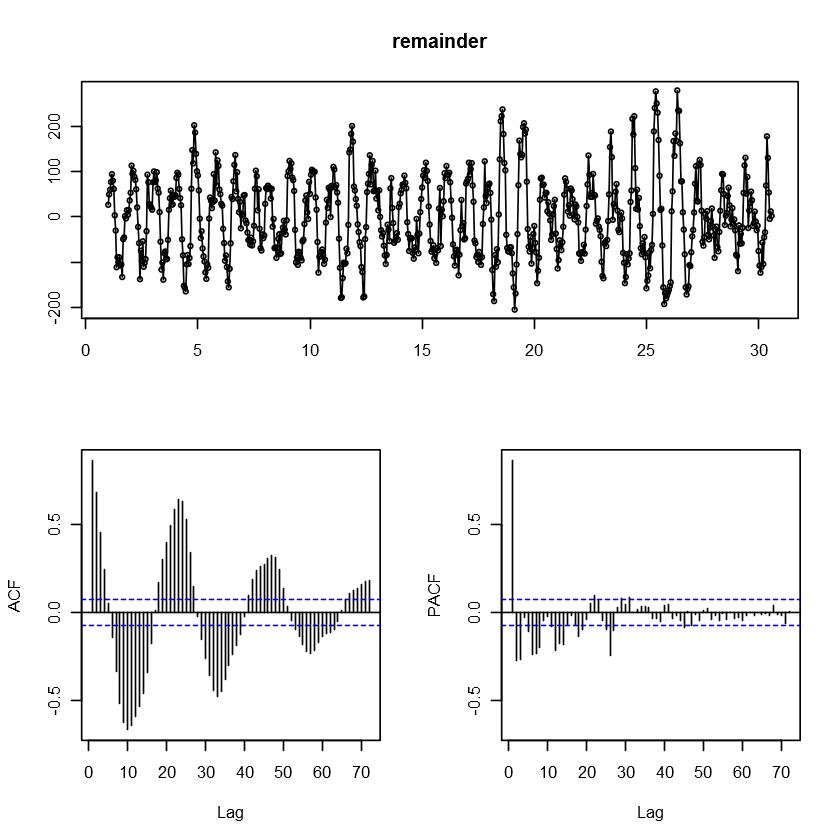

In [60]:
tsdisplay(remainder)

In [41]:
no_daily = fit$time.series[,'trend'] + fit$time.series[,'remainder']

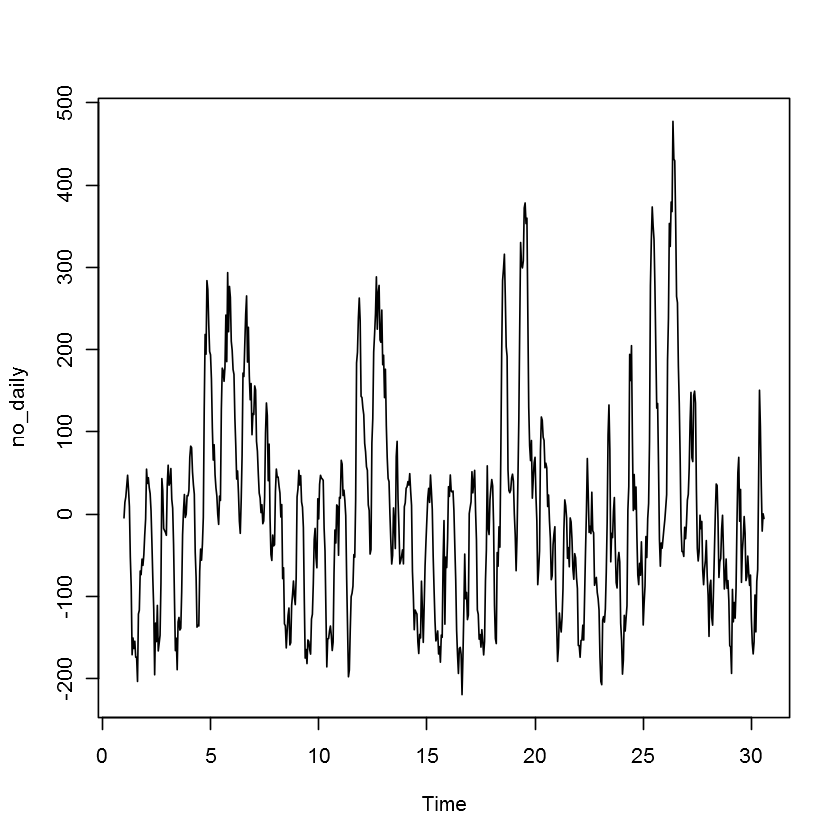

In [42]:
plot(no_daily)

In [63]:
arima_fit = auto.arima(remainder)

In [64]:
arima_fit

Series: remainder 
ARIMA(2,0,2)(2,0,2)[24] with zero mean     

Coefficients:
         ar1      ar2      ma1     ma2    sar1    sar2     sma1     sma2
      1.8302  -0.9133  -1.1331  0.1743  0.4461  0.2214  -0.2145  -0.1199
s.e.  0.0170   0.0173   0.0454  0.0481  0.7301  0.5836   0.7353   0.4268

sigma^2 estimated as 1267:  log likelihood=-3548.57
AIC=7115.14   AICc=7115.4   BIC=7156.24

In [65]:
library(astsa)


Attaching package: 'astsa'

The following object is masked from 'package:forecast':

    gas



ACF,PACF
0,0
0.03,0.03
-0.12,-0.12
-0.04,-0.04
0.05,0.06
0.08,0.07
0.07,0.05
-0.05,-0.04
-0.05,-0.03
-0.03,-0.01


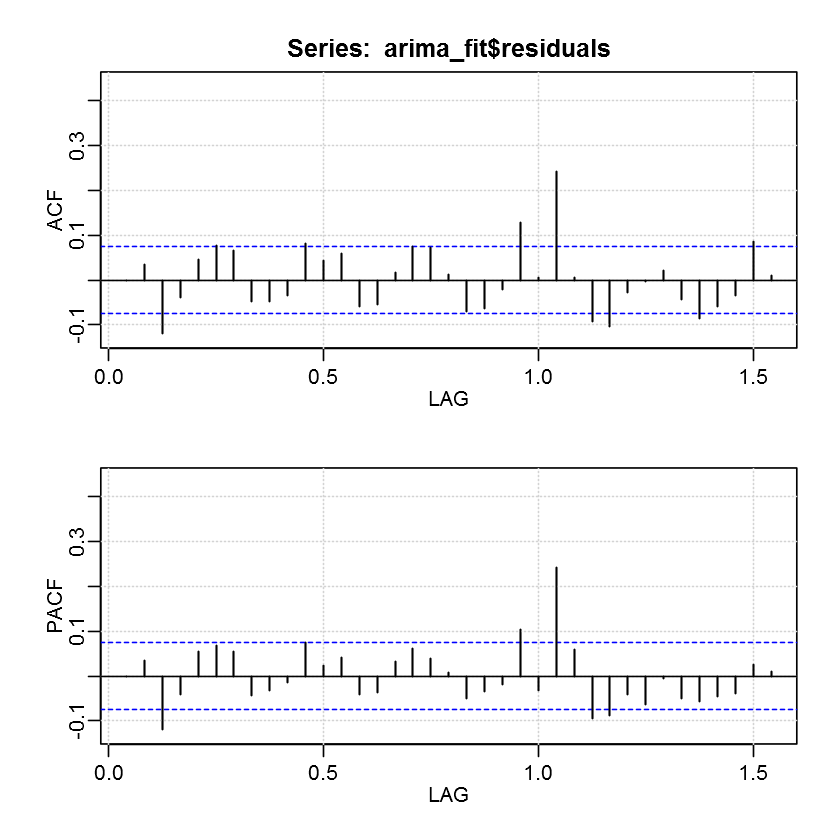

In [67]:
acf2(arima_fit$residuals)

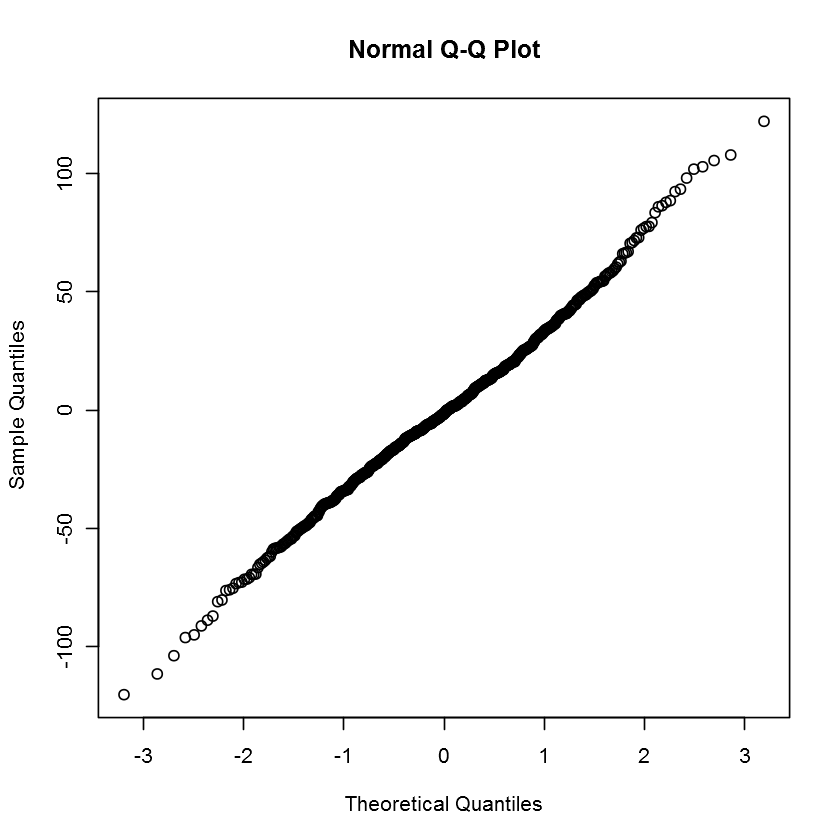

In [69]:
qqnorm(arima_fit$residuals)

In [70]:
cas_file <- 'E:/summary/june_casual.csv'
cas <- read.csv(cas_file)
total_file <- 'E:/summary/june_total.csv'
total <- read.csv(total_file)
df_total =data.frame(total)
df_cas = data.frame(cas)
missing = df_total[,'total']<5000
df_total[missing, 'total'] <- NA
df_cas[missing, 'casual'] <-NA
ts_total = ts(na.locf(df_total[,'total']))
ts_cas = ts(na.locf(df_cas[, 'casual']), frequency=24)

In [71]:
missing = df_total[,'total']<5000
df_total[missing, 'total'] <- NA
df_cas[missing, 'casual'] <-NA

In [84]:
ts_total = ts(na.locf(df_total[,'total']))
ts_cas = ts(na.locf(df_cas[, 'casual']), frequency=24)

In [76]:
length(ts_cas)

[1] 724

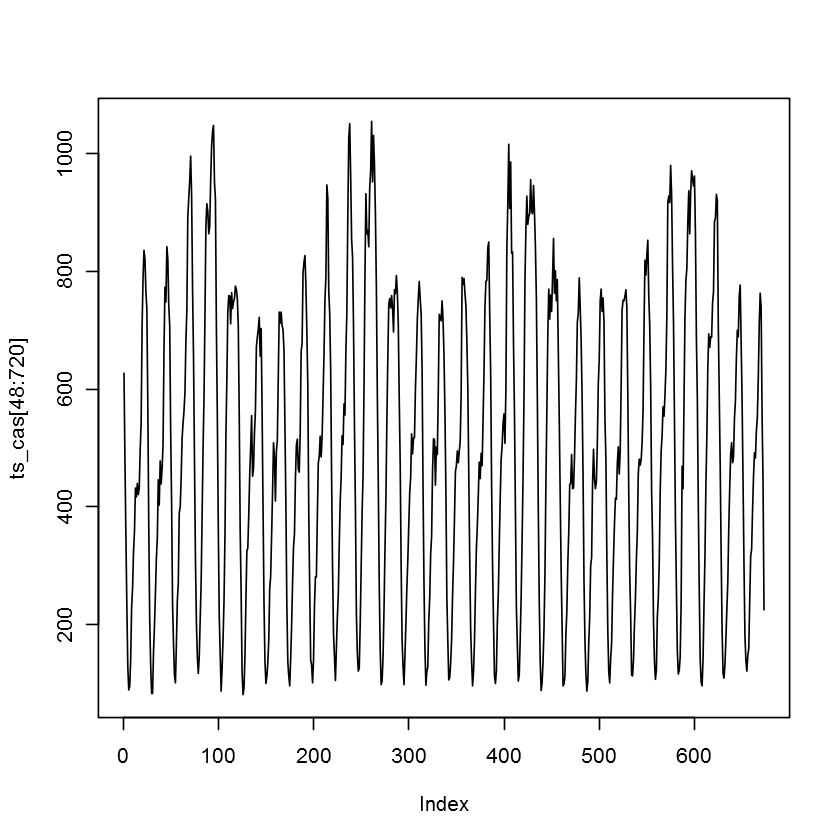

In [85]:
plot(ts_cas[48:720], type='l')

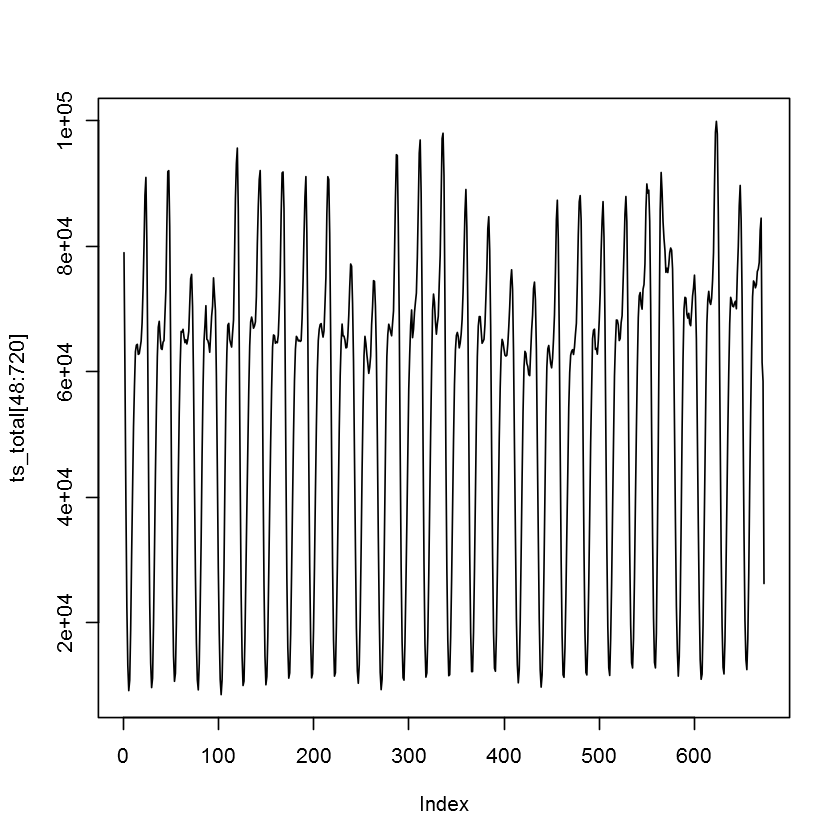

In [86]:
plot(ts_total[48:720], type='l')

In [81]:
fit = lm(ts_cas~ts_total)

In [82]:
res = ts(fit$residuals, frequency=24)

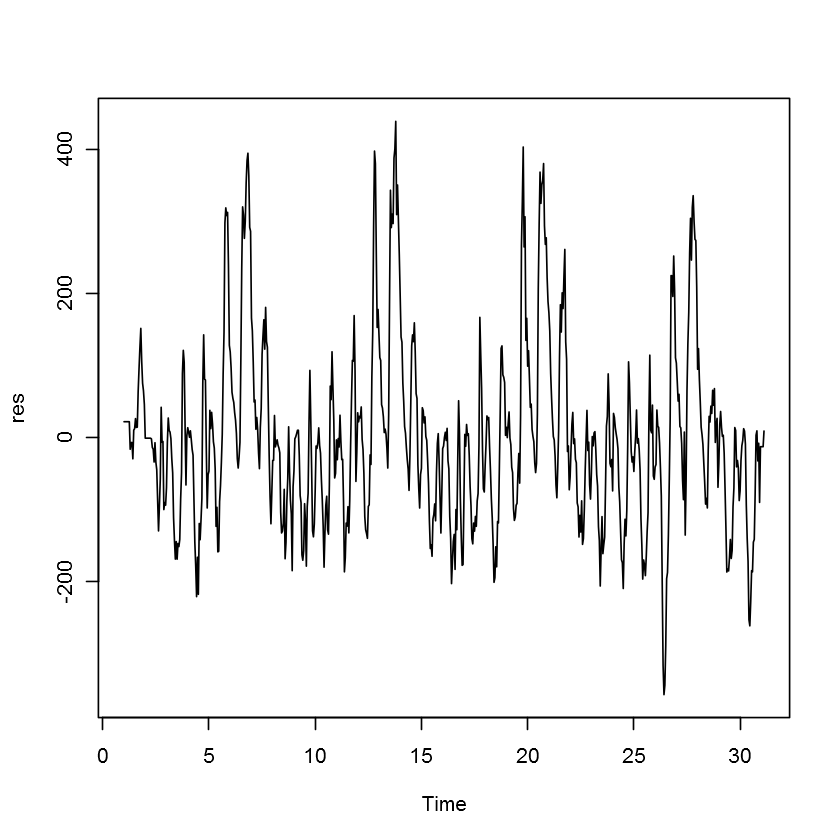

In [83]:
plot(res)

In [87]:
fit = stl(res, s.window='periodic')

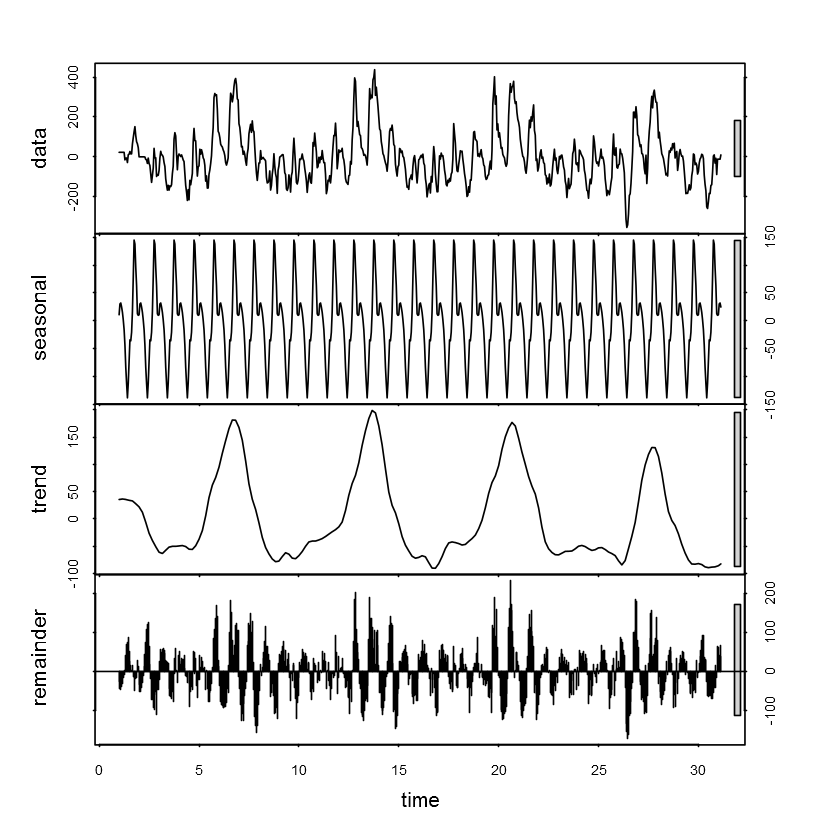

In [88]:
plot(fit)

In [91]:
remainder = fit$time.series[,'remainder']

In [92]:
arima_fit = auto.arima(remainder)

In [96]:
arima_fit2 = arima(remainder, order=c(2, 0, 2), seasonal=list(order=c(2, 0, 2), period=24))

In [97]:
arima_fit2


Call:
arima(x = remainder, order = c(2, 0, 2), seasonal = list(order = c(2, 0, 2), 
    period = 24))

Coefficients:
         ar1      ar2      ma1     ma2   sar1     sar2     sma1    sma2
      1.7900  -0.8817  -1.2306  0.2845  1.259  -0.9905  -1.3153  0.9995
s.e.  0.0223   0.0243   0.0460  0.0563  0.017   0.0068   0.0469  0.0549
      intercept
         0.0645
s.e.     0.6378

sigma^2 estimated as 943.2:  log likelihood = -3543.93,  aic = 7107.85

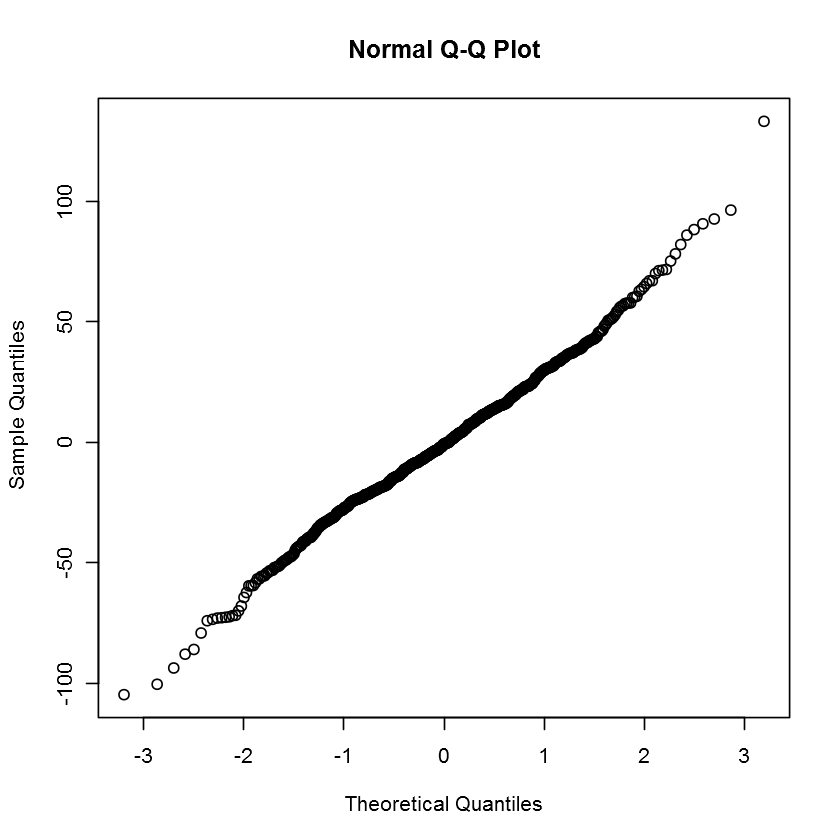

In [98]:
qqnorm(arima_fit2$residuals)

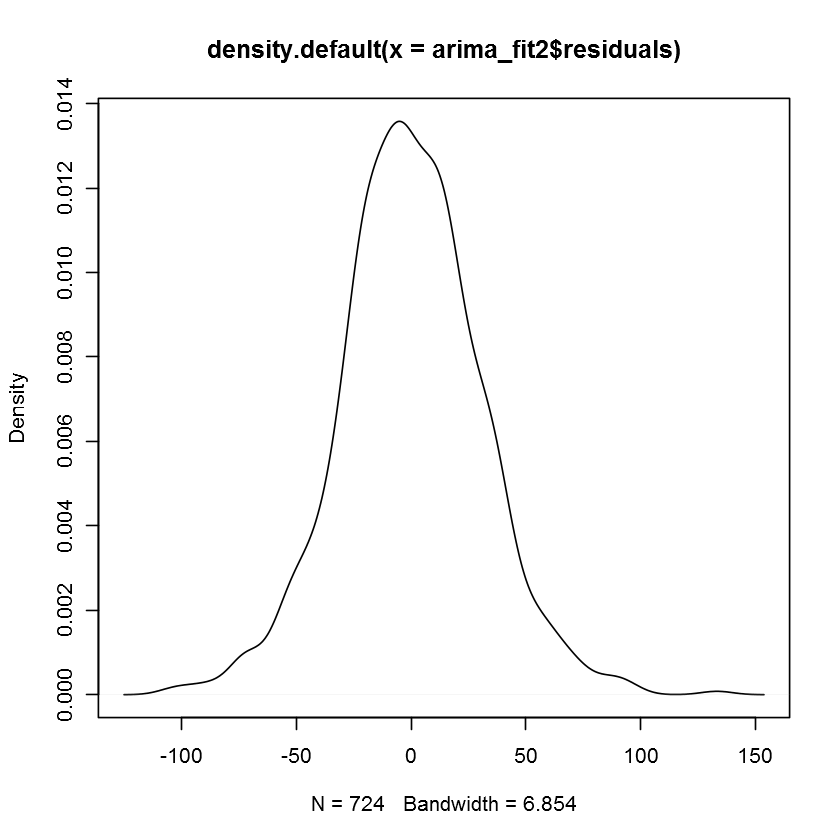

In [99]:
plot(density(arima_fit2$residuals))

ACF,PACF
0,0
0.01,0.01
-0.01,-0.01
0.02,0.02
-0.04,-0.04
0,0
0.03,0.03
0.04,0.04
0.04,0.04
0,0


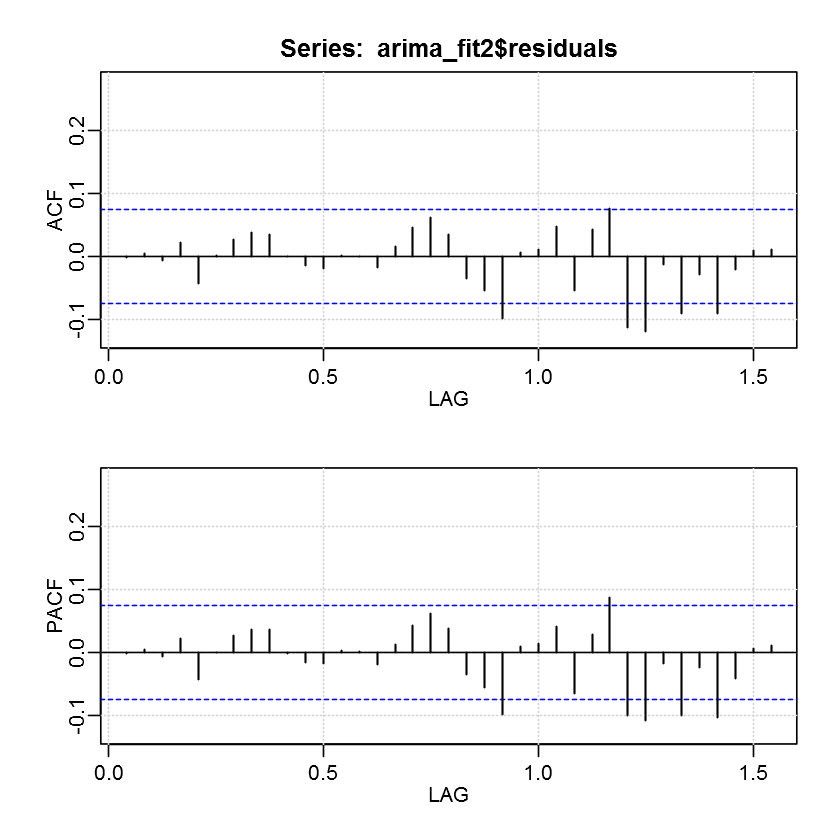

In [100]:
acf2(arima_fit2$residuals)

In [93]:
arima_fit

Series: remainder 
ARIMA(1,0,0)(2,0,1)[24] with zero mean     

Coefficients:
         ar1    sar1     sar2     sma1
      0.7662  0.7109  -0.2889  -0.6083
s.e.  0.0248  0.0792   0.0375   0.0783

sigma^2 estimated as 1370:  log likelihood=-3642.92
AIC=7295.84   AICc=7295.92   BIC=7318.76

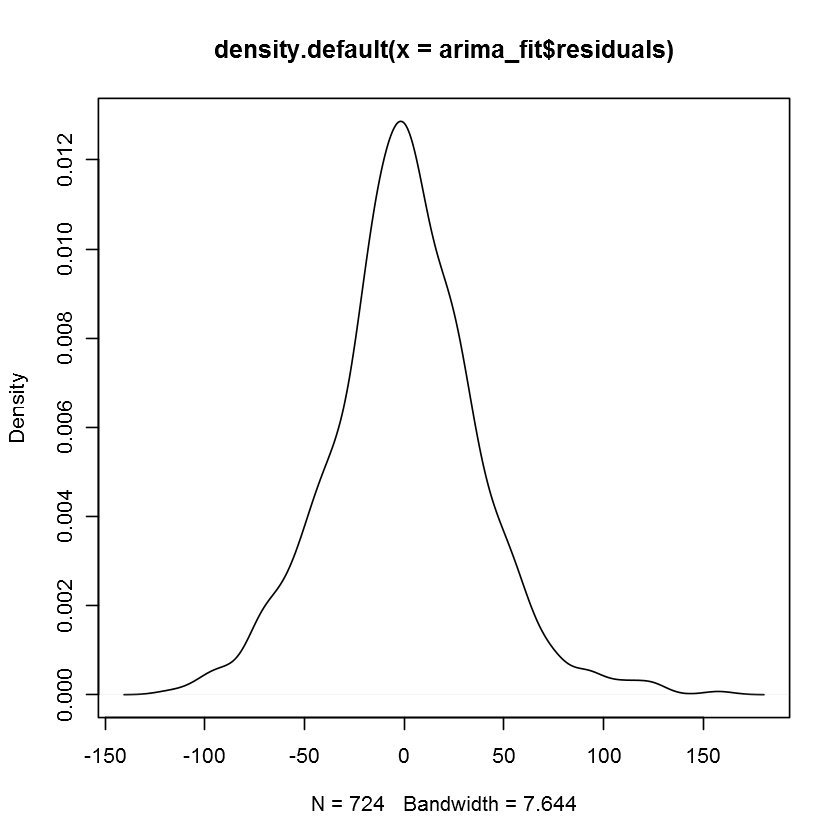

In [94]:
plot(density(arima_fit$residuals))

ACF,PACF
0.02,0.02
0.15,0.14
0.05,0.04
0.00,-0.02
-0.10,-0.11
-0.12,-0.12
-0.13,-0.10
-0.13,-0.09
-0.15,-0.11
-0.16,-0.15


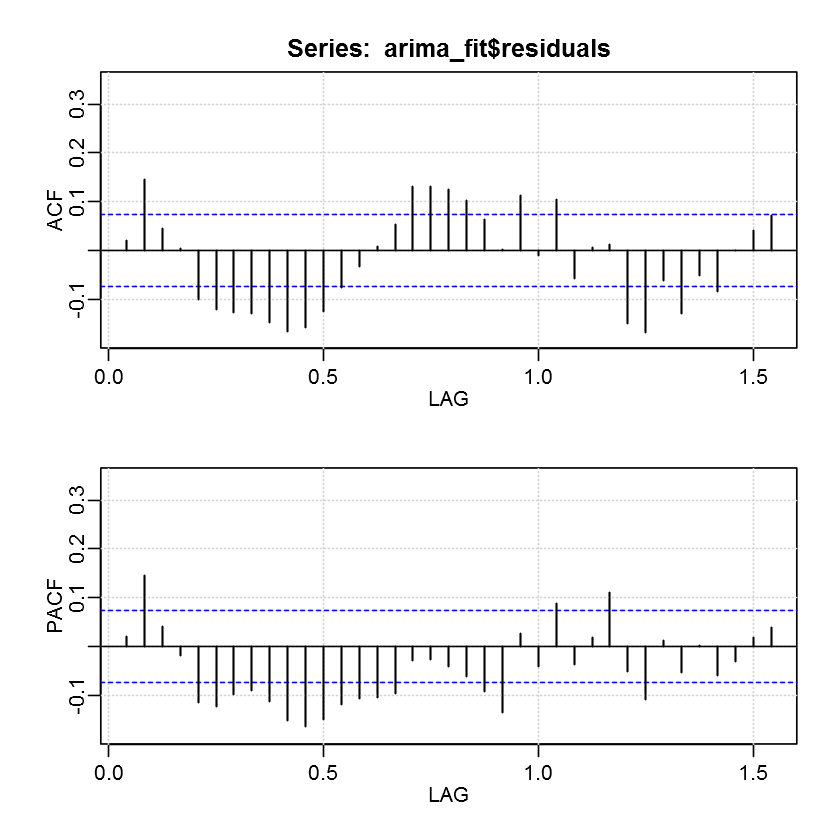

In [95]:
acf2(arima_fit$residuals)